### CSE-221710304062-Vaishnavi.B

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [32]:
# Get the number of rows and columns from the dataset
print(df.shape[0])# no. of rows
print(df.shape[1])# no. of columns

215
15


In [33]:
#Check how many categorical and numerical columns are there
print(len(df.select_dtypes(include=['object']).columns)) # no of Categorial columns
print(len(df.select_dtypes(include=['int64','float64']).columns)) # no of Numerical columns

8
7


In [34]:
#Get the basic descriptive information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [35]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [36]:
# Get the frequency of the categories in all the columns of the dataset
print(df.gender.value_counts())
print(df['ssc_b'].value_counts())
print(df['hsc_b'].value_counts())
print(df['hsc_s'].value_counts())
print(df['degree_t'].value_counts())
print(df['specialisation'].value_counts())
print(df['status'].value_counts())

M    139
F     76
Name: gender, dtype: int64
Central    116
Others      99
Name: ssc_b, dtype: int64
Others     131
Central     84
Name: hsc_b, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
Placed        148
Not Placed     67
Name: status, dtype: int64


In [37]:
#Check for the missing values and if found any visualize the missing values using seaborn, missingno libraries.
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

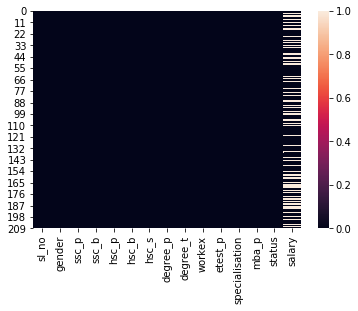

In [38]:
sns.heatmap(df.isna())

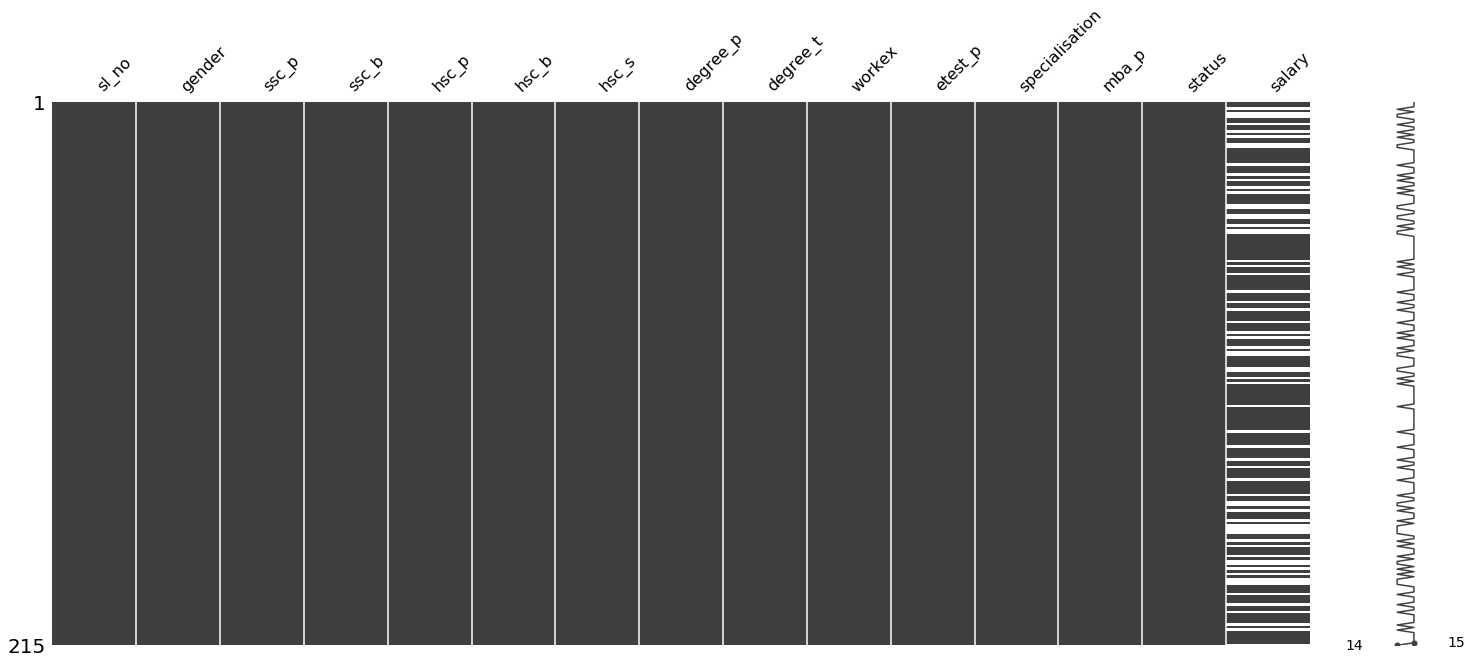

In [39]:
import missingno as msno
msno.matrix(df)

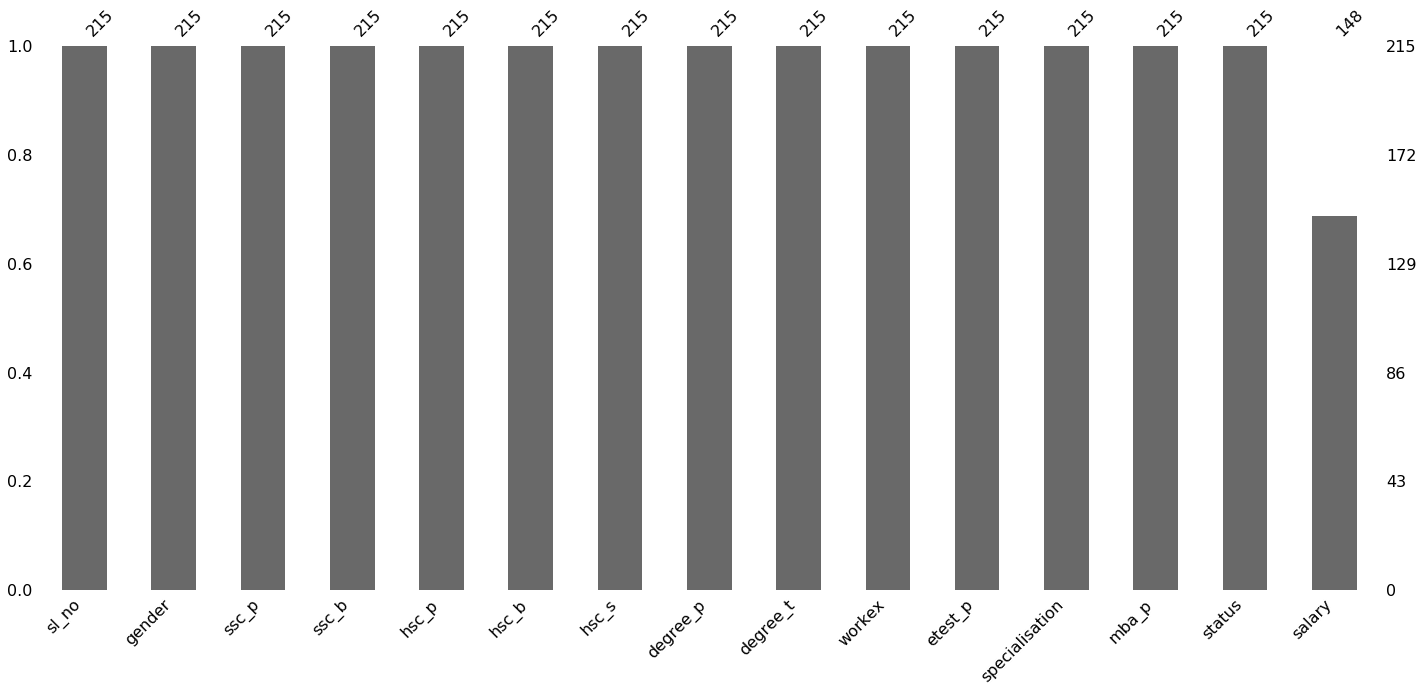

In [40]:
msno.bar(df)

In [41]:
# Impute the missing values based on numerical and categorical
df_mean_imputed = df.fillna(df.mean())
df_median_imputed = df.fillna(df.median())
df_zero_imputed = df.fillna(0)

In [42]:
df_mean_imputed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [43]:
df_median_imputed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [44]:
df_zero_imputed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002864E78CC08>,
      dtype=object)

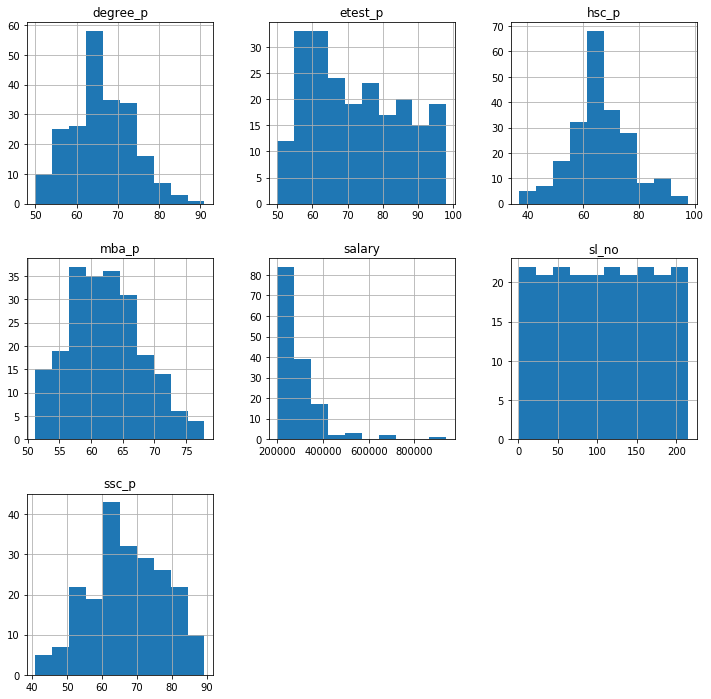

In [45]:
# Plot all the columns from the dataset; try to get some observations from the plot and write your inferences below the plots generated
df.hist(figsize=(12,12))

In [46]:
df.gender.value_counts(normalize=True)

M    0.646512
F    0.353488
Name: gender, dtype: float64

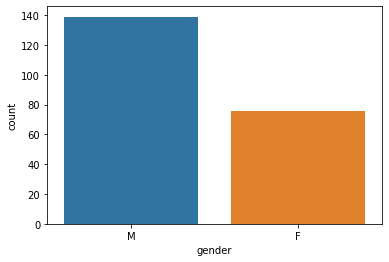

In [47]:
sns.countplot(df['gender'])

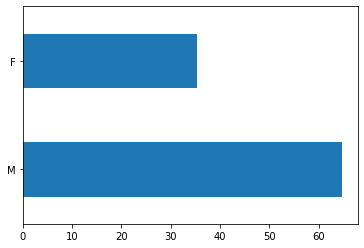

In [48]:
(df.gender.value_counts(normalize=True)*100).plot.barh()

Text(0.5, 1.0, 'No of Males and Females')

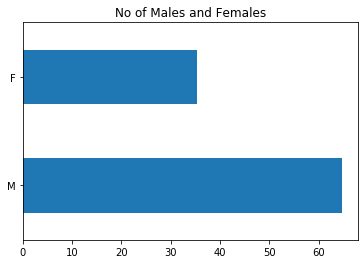

In [49]:
(df.gender.value_counts(normalize=True)*100).plot.barh().set_title("No of Males and Females")

In [50]:
# Encode the categorical columns using different kinds of encoding techniques from pandas and scikit-learn
merge_d=pd.get_dummies(df,columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'])
merge_d

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,NaN,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # creating an object
merge_d=sc.fit_transform(merge_d)
merge_d

array([[-1.72401341, -0.02808697,  2.2688123 , ...,  1.12390297,
        -0.67283185,  0.67283185],
       [-1.70790113,  1.11336869,  1.10344799, ..., -0.88975652,
        -0.67283185,  0.67283185],
       [-1.69178886, -0.21323793,  0.15331275, ..., -0.88975652,
        -0.67283185,  0.67283185],
       ...,
       [ 1.69178886, -0.02808697,  0.06133451, ..., -0.88975652,
        -0.67283185,  0.67283185],
       [ 1.70790113,  0.61994138, -0.03064373, ...,  1.12390297,
        -0.67283185,  0.67283185],
       [ 1.72401341, -0.49096436, -0.76646966, ...,  1.12390297,
         1.48625544, -1.48625544]])

In [52]:
merge_d=pd.DataFrame(merge_d)
merge_d

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.724013,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,-0.200292,-0.739434,0.739434,-1.082459,...,-0.856663,-1.439246,-0.23221,1.626059,0.724446,-0.724446,-1.123903,1.123903,-0.672832,0.672832
1,-1.707901,1.113369,1.103448,1.513267,1.087157,0.687620,-0.951839,-0.739434,0.739434,0.923823,...,1.167321,-1.439246,-0.23221,1.626059,-1.380364,1.380364,0.889757,-0.889757,-0.672832,0.672832
2,-1.691789,-0.213238,0.153313,-0.322843,0.218908,-0.769474,-0.415019,-0.739434,0.739434,0.923823,...,-0.856663,0.694808,-0.23221,-0.614984,0.724446,-0.724446,0.889757,-0.889757,-0.672832,0.672832
3,-1.675677,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,NaN,-0.739434,0.739434,0.923823,...,1.167321,-1.439246,-0.23221,1.626059,0.724446,-0.724446,-1.123903,1.123903,1.486255,-1.486255
4,-1.659564,1.712332,0.668391,0.943909,1.864806,-1.164676,1.463849,-0.739434,0.739434,0.923823,...,-0.856663,0.694808,-0.23221,-0.614984,0.724446,-0.724446,0.889757,-0.889757,-0.672832,0.672832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.659564,1.230940,1.441008,1.529612,1.426906,2.098321,1.195439,-0.739434,0.739434,-1.082459,...,-0.856663,0.694808,-0.23221,-0.614984,0.724446,-0.724446,0.889757,-0.889757,-0.672832,0.672832
211,1.675677,-0.861266,-0.582513,0.766836,0.143408,-1.487711,-0.146610,-0.739434,0.739434,-1.082459,...,1.167321,-1.439246,-0.23221,1.626059,0.724446,-0.724446,0.889757,-0.889757,-0.672832,0.672832
212,1.691789,-0.028087,0.061335,0.903046,-0.989091,1.278706,0.068118,-0.739434,0.739434,-1.082459,...,-0.856663,0.694808,-0.23221,-0.614984,-1.380364,1.380364,0.889757,-0.889757,-0.672832,0.672832
213,1.707901,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,-0.908893,1.352386,-1.352386,-1.082459,...,-0.856663,0.694808,-0.23221,-0.614984,0.724446,-0.724446,-1.123903,1.123903,-0.672832,0.672832


In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer(transformers=[('Encoder',OneHotEncoder(),['status'])],remainder="passthrough")

df1=ct.fit_transform(df)
df1=pd.DataFrame(df1)
df1=df1.iloc[:,0:2]
df1.columns=['status_Placed','status_Not Placed']
df1=pd.concat([df,df1],axis=1)
df1=df1.drop('status',axis=1)
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status_Placed,status_Not Placed
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,1,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,0,1
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,0,1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,0,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,0,1


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1.Sex=le.fit_transform(df1.gender)
df1

C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status_Placed,status_Not Placed
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,1,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,0,1
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,0,1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,0,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,0,1
